# Sampling

> We begin with discussing the details around collecting data, which is what the data analyst in our story did when she surveyed employees.

- author: Victor Omondi
- toc: true
- categories: [sampling]
- comments: true
- image:

In [1]:
%matplotlib inline

# Population and samples

In statistics, the set of  *all*  individuals relevant to a particular statistical question is called a  **population** .

A smaller group selected from a population is called a sample. When we select a smaller group from a population we do sampling.

![img](https://s3.amazonaws.com/dq-content/283/s1m1_Sampling_v2.svg) 

Populations do not necessarily consist of people. Behavioral scientists, for instance, often try to answer questions about populations of monkeys, rats or other lab animals. In a similar way, other people try to answer questions about countries, companies, vegetables, soils, pieces of equipment produced in a factory, etc.

The individual elements of a population or a sample go under many names. You'll often see the elements of a population referred to as  *individuals, units, events, observations* . These are all used interchangeably and refer to the same thing: the individual parts of a population. When we use the term "population individuals", the population is not necessarily composed of people. "Individuals" here is a general term that could refer to people, needles, frogs, stars, etc.

In the case of a sample, you'll often see this terminology used interchangeably:  *sample unit, sample point, sample individual, or sample observation* .

![img](https://s3.amazonaws.com/dq-content/283/s1m1_units.svg)

# Sampling Error

For every statistical question we want to answer, we should try to use the population. In practice, that's not always possible because the populations of interest usually vary from large to extremely large. Also, getting data is generally not an easy task, so small populations often pose problems too.

These problems can be solved by sampling from the population that interests us. Although not as good as working with the entire population, working with a sample is the next best thing we can do.

When we sample, the data we get might be more or less similar to the data in the population. For instance, let's say we know that the average salary in our company is $34500, and the proportion of women is 60%. We take two samples and find these results:

![img](https://s3.amazonaws.com/dq-content/283/s1m1_two_samples.svg)

As you can see, the metrics of the two samples are different than the metrics of the population. A sample is by definition an incomplete set of data for the question we're trying to answer. For this reason, there's almost always some difference between the metrics of a population and the metrics of a sample. This difference can be seen as an error, and because it's the result of sampling, it's called  **sampling error**

A metric specific to a population is called a  **parameter** , while one specific to a sample is called a  **statistic** . In our example above, the average salary of  *all the employees*  is a parameter because it's a metric that describes the entire population. The average salaries from our two samples are examples of statistics because they only describe the samples.

Another way to think of the concept of the sampling error is as the difference between a parameter and a statistic:
$$
{sampling \ error}={parameter}-{statistic}
$$

We'll move from the tech company example to working with a real world data set. Our first challenge will be to measure sampling error using this data set.

The data set is about basketball players in WNBA (Women's National Basketball Association), and contains general information about players, along with their metrics for the season 2016-2017. The data set was put together by Thomas De Jonghe, and can be downloaded from [Kaggle](https://www.kaggle.com/jinxbe/wnba-player-stats-2017), where you can also find useful documentation for the data set.

# Libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## Libraries Configuration

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

plt.style.use('fivethirtyeight')

## Get familiar with the data set

In [5]:
wnba = pd.read_csv('datasets/wnba.csv')
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,2,8,173,30,85,35.3,12,32,37.5,21,26,80.8,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,12,30,947,90,177,50.8,5,18,27.8,32,41,78.0,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,4,26,617,82,218,37.6,19,64,29.7,35,42,83.3,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,6,31,721,75,195,38.5,21,68,30.9,17,21,81.0,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,R,24,137,16,50,32.0,7,20,35.0,11,12,91.7,3,9,12,12,7,0,14,50,0,0


In [6]:
wnba.tail()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,Experience,Games Played,MIN,FGM,FGA,FG%,15:00,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,6,29,861,144,331,43.5,43,112,38.4,136,161,84.5,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,9,22,127,12,25,48.0,0,1,0.0,4,6,66.7,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,2,27,671,83,238,34.9,17,69,24.6,94,102,92.2,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,8,29,952,227,509,44.6,18,56,32.1,110,135,81.5,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,2,30,356,59,140,42.1,11,47,23.4,22,28,78.6,11,13,24,30,18,1,32,151,0,0


In [7]:
wnba.shape

(143, 32)

## measure of the sampling error.

We will use the  `Games Played`  column to find the maximum number of games played by a player in the season 2016-2017. The data set contains all the players that had at least one game, so it's a population relative to our question.

In [8]:
parameter = wnba['Games Played'].max()
parameter

32

We will sample randomly 30 players from the population and find the maximum number of games played

In [9]:
statistic = wnba['Games Played'].sample(30, random_state=1).max()
statistic

30

### the sampling error

In [10]:
sampling_error = parameter - statistic
sampling_error

2

# Simple Random Sampling

When we sample we want to minimize the sampling error as much as possible. We want our sample to mirror the population as closely as possible.

In statistical terms, we want our samples to be  **representative**  of their corresponding populations. If a sample is representative, then the sampling error is low. The more representative a sample is, the smaller the sampling error. The less representative a sample is, the greater the sampling error.

![img](https://s3.amazonaws.com/dq-content/283/s1m1_representativity.svg)

To make our samples representative, we can try to give every individual in the population an equal chance to be selected in our samples. We want a very tall individual to have the same chance as being selected as an individual having a medium or short height. To give every individual an equal chance of being picked, we need to sample  **randomly** .

One way to perform random sampling is to generate random numbers and use them to select a few sample units from the population. In statistics, this sampling method is called  **simple random sampling** , and it's often abbreviated as  **SRS** .

![img](https://s3.amazonaws.com/dq-content/283/s1m1_Simple_random_sampling_v2.svg)

We used  `Series.sample()`  to sample. This method performs simple random sampling by generating an array of random numbers, and then using those numbers to select values from a  `Series`  at the indices corresponding to those random numbers. The method can be also extended for  `DataFrame`  [objects](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sample.html?highlight=sample#pandas.DataFrame.sample), where random rows or columns can be sampled.

When we use the  `random_state`  parameter, like we did with  `Series.sample(30, random_state = 1)` , we make the generation of random numbers predictable. This is because  `Series.sample()`  uses a [pseudorandom number generator](https://en.wikipedia.org/wiki/Pseudorandom_number_generator) under the hood. A pseudorandom number generator uses an  *initial value*  to generate a sequence of numbers that has properties similar to those of a sequence that is truly random. With  `random_state`  we specify that initial value used by the pseudorandom number generator.

If we want to generate a sequence of five numbers using a pseudorandom generator, and begin from an initial value of 1, we'll get the same five numbers no matter how many times we run the code. If we ran  `wnba['Games Played'].sample(5, random_state = 1)`  we'd get the same sample every time we run the code.

Pseudorandom number generators are of great use in scientific research where [reproducible work](https://en.wikipedia.org/wiki/Reproducibility) is necessary.

Let's visualize the discrepancy between a parameter and its corresponding statistics in the case of simple random sampling.

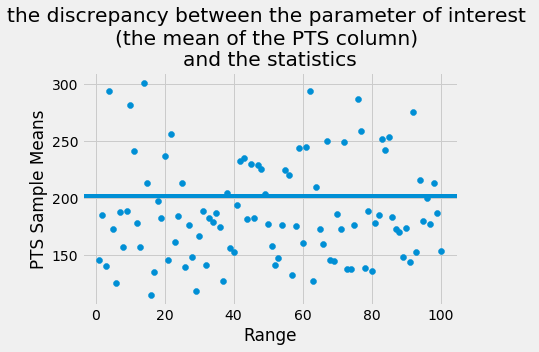

In [14]:
pts_population_mean = wnba.PTS.mean()
pts_sample_means = [wnba.PTS.sample(10, random_state=i).mean() for i in range(100)]
plt.scatter(range(1, 101), pts_sample_means)
plt.axhline(pts_population_mean)
plt.title('the discrepancy between the parameter of interest \n(the mean of the PTS column) \nand the statistics')
plt.ylabel('PTS Sample Means')
plt.xlabel('Range')
plt.show()

The sample means vary a lot around the population mean. With a minimum sample mean of 115 points, a maximum of 301.4, and a population mean of roughly 201.8, we can tell that the sampling error is quite large for some of the cases.

# The importance of sample size